In [35]:
from pyspark.sql.types import *

In [84]:
customSchema = StructType([
    StructField("Age", IntegerType(), True), 
    StructField("Sex", IntegerType(), True), 
    StructField("Chest pain type", IntegerType(), True), 
    StructField("BP", IntegerType(), True), 
    StructField("Cholesterol", IntegerType(), True), 
    StructField("FBS over 120", IntegerType(), True), 
    StructField("EKG results", IntegerType(), True), 
    StructField("Max HR", IntegerType(), True), 
    StructField("Exercise angina", IntegerType(), True), 
    StructField("ST depression", DoubleType(), True), 
    StructField("Slope of ST", IntegerType(), True), 
    StructField("Number of vessels fluro", IntegerType(), True), 
    StructField("Thallium", IntegerType(), True), 
    StructField("Heart Disease", StringType(), True)])
    

df = spark.read.load('hdfs://localhost:9000/user1/Heart_Disease_Prediction.csv', format="csv", header="true", sep=',', schema=customSchema)
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Sex: integer (nullable = true)
 |-- Chest pain type: integer (nullable = true)
 |-- BP: integer (nullable = true)
 |-- Cholesterol: integer (nullable = true)
 |-- FBS over 120: integer (nullable = true)
 |-- EKG results: integer (nullable = true)
 |-- Max HR: integer (nullable = true)
 |-- Exercise angina: integer (nullable = true)
 |-- ST depression: double (nullable = true)
 |-- Slope of ST: integer (nullable = true)
 |-- Number of vessels fluro: integer (nullable = true)
 |-- Thallium: integer (nullable = true)
 |-- Heart Disease: string (nullable = true)



In [37]:
df.show(5)

+---+---+---------------+---+-----------+------------+-----------+------+---------------+-------------+-----------+-----------------------+--------+-------------+
|Age|Sex|Chest pain type| BP|Cholesterol|FBS over 120|EKG results|Max HR|Exercise angina|ST depression|Slope of ST|Number of vessels fluro|Thallium|Heart Disease|
+---+---+---------------+---+-----------+------------+-----------+------+---------------+-------------+-----------+-----------------------+--------+-------------+
| 70|  1|              4|130|        322|           0|          2|   109|              0|          2.4|          2|                      3|       3|     Presence|
| 67|  0|              3|115|        564|           0|          2|   160|              0|          1.6|          2|                      0|       7|      Absence|
| 57|  1|              2|124|        261|           0|          0|   141|              0|          0.3|          1|                      0|       7|     Presence|
| 64|  1|             

In [38]:
from pyspark.sql import functions 

In [39]:
df = df.withColumn('Heart Disease',functions.when(df['Heart Disease']=='Presence',1).otherwise(0))

In [40]:
df.show(5)

+---+---+---------------+---+-----------+------------+-----------+------+---------------+-------------+-----------+-----------------------+--------+-------------+
|Age|Sex|Chest pain type| BP|Cholesterol|FBS over 120|EKG results|Max HR|Exercise angina|ST depression|Slope of ST|Number of vessels fluro|Thallium|Heart Disease|
+---+---+---------------+---+-----------+------------+-----------+------+---------------+-------------+-----------+-----------------------+--------+-------------+
| 70|  1|              4|130|        322|           0|          2|   109|              0|          2.4|          2|                      3|       3|            1|
| 67|  0|              3|115|        564|           0|          2|   160|              0|          1.6|          2|                      0|       7|            0|
| 57|  1|              2|124|        261|           0|          0|   141|              0|          0.3|          1|                      0|       7|            1|
| 64|  1|             

In [41]:
import numpy as np

In [42]:
df.collect()

[Row(Age=70, Sex=1, Chest pain type=4, BP=130, Cholesterol=322, FBS over 120=0, EKG results=2, Max HR=109, Exercise angina=0, ST depression=2.4, Slope of ST=2, Number of vessels fluro=3, Thallium=3, Heart Disease=1),
 Row(Age=67, Sex=0, Chest pain type=3, BP=115, Cholesterol=564, FBS over 120=0, EKG results=2, Max HR=160, Exercise angina=0, ST depression=1.6, Slope of ST=2, Number of vessels fluro=0, Thallium=7, Heart Disease=0),
 Row(Age=57, Sex=1, Chest pain type=2, BP=124, Cholesterol=261, FBS over 120=0, EKG results=0, Max HR=141, Exercise angina=0, ST depression=0.3, Slope of ST=1, Number of vessels fluro=0, Thallium=7, Heart Disease=1),
 Row(Age=64, Sex=1, Chest pain type=4, BP=128, Cholesterol=263, FBS over 120=0, EKG results=0, Max HR=105, Exercise angina=1, ST depression=0.2, Slope of ST=2, Number of vessels fluro=1, Thallium=7, Heart Disease=0),
 Row(Age=74, Sex=0, Chest pain type=2, BP=120, Cholesterol=269, FBS over 120=0, EKG results=2, Max HR=121, Exercise angina=1, ST dep

In [43]:
data_array =  np.array(df.collect())
data_array #view the array

array([[70.,  1.,  4., ...,  3.,  3.,  1.],
       [67.,  0.,  3., ...,  0.,  7.,  0.],
       [57.,  1.,  2., ...,  0.,  7.,  1.],
       ...,
       [56.,  0.,  2., ...,  0.,  3.,  0.],
       [57.,  1.,  4., ...,  0.,  6.,  0.],
       [67.,  1.,  4., ...,  3.,  3.,  1.]])

In [44]:
data_array.shape

(270, 14)

In [45]:
data_array[0]

array([ 70. ,   1. ,   4. , 130. , 322. ,   0. ,   2. , 109. ,   0. ,
         2.4,   2. ,   3. ,   3. ,   1. ])

In [46]:
print(data_array.max(axis=0))
print(data_array.min(axis=0))

[ 77.    1.    4.  200.  564.    1.    2.  202.    1.    6.2   3.    3.
   7.    1. ]
[ 29.   0.   1.  94. 126.   0.   0.  71.   0.   0.   1.   0.   3.   0.]


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
np.random.seed(12345)

In [49]:
w1 = np.random.randn()
w2 = np.random.randn()
b= np.random.randn()

In [50]:
print(w1, w2, b)

-0.20470765948471295 0.47894333805754824 -0.5194387150567381


In [51]:
X = data_array[:,:13]
y = data_array[:,13]
print(X,y)

[[70.  1.  4. ...  2.  3.  3.]
 [67.  0.  3. ...  2.  0.  7.]
 [57.  1.  2. ...  1.  0.  7.]
 ...
 [56.  0.  2. ...  2.  0.  3.]
 [57.  1.  4. ...  2.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]] [1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 0

In [52]:
x_mean = X.mean(axis=0)
x_std = X.std(axis=0)
print(x_mean, x_std)

[5.44333333e+01 6.77777778e-01 3.17407407e+00 1.31344444e+02
 2.49659259e+02 1.48148148e-01 1.02222222e+00 1.49677778e+02
 3.29629630e-01 1.05000000e+00 1.58518519e+00 6.70370370e-01
 4.69629630e+00] [ 9.09218223  0.46732757  0.94832898 17.82850056 51.59043307  0.35524678
  0.99604155 23.1227775   0.47007865  1.14308711  0.61325102  0.94214681
  1.93706182]


In [53]:
#Age Only For Now
print('standard deviation')
print(round(X[:,0].std(axis=0),0))
print('mean')
print(round(X[:,0].mean(axis=0),0))

standard deviation
9.0
mean
54.0


In [54]:
data_array = np.column_stack((X[:,0], X[:,1], X[:,2], X[:,3], X[:,4], X[:,5], X[:,6], X[:,7], X[:,8], X[:,9], X[:,10], X[:,11], X[:,12],y))
print(data_array)

[[70.  1.  4. ...  3.  3.  1.]
 [67.  0.  3. ...  0.  7.  0.]
 [57.  1.  2. ...  0.  7.  1.]
 ...
 [56.  0.  2. ...  0.  3.  0.]
 [57.  1.  4. ...  0.  6.  0.]
 [67.  1.  4. ...  3.  3.  1.]]


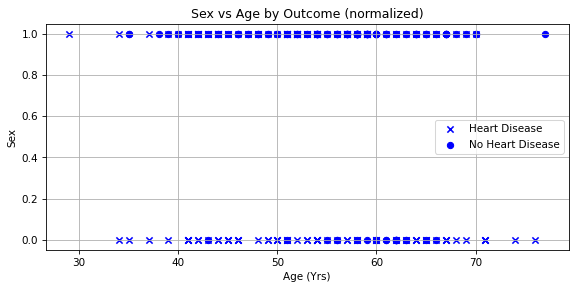

In [55]:
# formatting the plot grid, scales, and figure size
plt.figure(figsize=(9, 4), dpi= 75)
# plt.axis([min_x,max_x,min_y,max_y])
plt.grid()
for i in range(len(data_array)):
    value_n = data_array[i]
    # assign labels values to specific matrix elements
    outcome_n = value_n[13]
    height_n = value_n[0]
    sex_n = value_n[1]
    an = plt.scatter(height_n[outcome_n==0.0],sex_n[outcome_n==0.0], marker = 'x', c= 'b', label = 'Heart Disease')
    bn = plt.scatter(height_n[outcome_n==1.0],sex_n[outcome_n==1.0], marker = 'o', c= 'b', label = 'No Heart Disease')    
    # plot values, title, legend, x and y axis
    plt.title('Sex vs Age by Outcome (normalized)')
    plt.xlabel('Age (Yrs)')
    plt.ylabel('Sex')
    plt.legend(handles=[an,bn])

New Section for NN

In [56]:
#Create first network with Keras
import keras
from keras.models import Sequential
from keras.layers import Dense
import numpy
import pandas as pd
import sklearn
from sklearn.preprocessing import StandardScaler

In [57]:
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)

In [58]:
dataset = df

In [59]:
dataset.head()

Row(Age=70, Sex=1, Chest pain type=4, BP=130, Cholesterol=322, FBS over 120=0, EKG results=2, Max HR=109, Exercise angina=0, ST depression=2.4, Slope of ST=2, Number of vessels fluro=3, Thallium=3, Heart Disease=1)

In [60]:
# split into input (X ie dependent variables) and output (Y ie independent variables) variables
#X = dataset.iloc[:,0:13]   #0-13 columns are dependent variables - remember 8th column is not included
#Y = dataset.iloc[:,13]#13 column is independent variable
#Y= Y.reshape(-1,1)
print(X,y)

[[70.  1.  4. ...  2.  3.  3.]
 [67.  0.  3. ...  2.  0.  7.]
 [57.  1.  2. ...  1.  0.  7.]
 ...
 [56.  0.  2. ...  2.  0.  3.]
 [57.  1.  4. ...  2.  0.  6.]
 [67.  1.  4. ...  2.  3.  3.]] [1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1.
 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.
 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0.
 1. 0

In [61]:
type(X)

numpy.ndarray

In [62]:
X.shape

(270, 13)

In [63]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [74]:
# create model
model = Sequential()
# model.add(Dense(1000, input_dim=8, activation='relu')) # 1000 neurons
# model.add(Dense(100, activation='tanh')) # 100 neurons with tanh activation function
model.add(Dense(500, input_dim=13, activation='relu')) # 500 neurons
# 93.36% accuracy with 500 neurons
# 86.99% accuracy with 100 neurons
# 85.2% accuracy with 50 neurons
# 81.38% accuracy with 10 neurons
model.add(Dense(1, activation='sigmoid')) # 1 output neuron

In [75]:
Y = y
#Y= Y.reshape(-1,1)

In [76]:
Y.shape

(270,)

In [77]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, Y, epochs=150, batch_size=10,  verbose=2) # 150 epoch, 10 batch size, verbose = 2

Epoch 1/150
27/27 - 1s - 39ms/step - accuracy: 0.8111 - loss: 0.5104
Epoch 2/150
27/27 - 0s - 4ms/step - accuracy: 0.8444 - loss: 0.3647
Epoch 3/150
27/27 - 0s - 5ms/step - accuracy: 0.8556 - loss: 0.3333
Epoch 4/150
27/27 - 0s - 4ms/step - accuracy: 0.8667 - loss: 0.3181
Epoch 5/150
27/27 - 0s - 4ms/step - accuracy: 0.8741 - loss: 0.3053
Epoch 6/150
27/27 - 0s - 5ms/step - accuracy: 0.8741 - loss: 0.2966
Epoch 7/150
27/27 - 0s - 5ms/step - accuracy: 0.8815 - loss: 0.2869
Epoch 8/150
27/27 - 0s - 4ms/step - accuracy: 0.8852 - loss: 0.2801
Epoch 9/150
27/27 - 0s - 5ms/step - accuracy: 0.8852 - loss: 0.2707
Epoch 10/150
27/27 - 0s - 4ms/step - accuracy: 0.8926 - loss: 0.2639
Epoch 11/150
27/27 - 0s - 5ms/step - accuracy: 0.8926 - loss: 0.2563
Epoch 12/150
27/27 - 0s - 7ms/step - accuracy: 0.8926 - loss: 0.2495
Epoch 13/150
27/27 - 0s - 7ms/step - accuracy: 0.8963 - loss: 0.2396
Epoch 14/150
27/27 - 0s - 4ms/step - accuracy: 0.9037 - loss: 0.2332
Epoch 15/150
27/27 - 0s - 4ms/step - accur

Epoch 120/150
27/27 - 0s - 5ms/step - accuracy: 1.0000 - loss: 0.0100
Epoch 121/150
27/27 - 0s - 2ms/step - accuracy: 1.0000 - loss: 0.0095
Epoch 122/150
27/27 - 0s - 2ms/step - accuracy: 1.0000 - loss: 0.0096
Epoch 123/150
27/27 - 0s - 6ms/step - accuracy: 1.0000 - loss: 0.0089
Epoch 124/150
27/27 - 0s - 3ms/step - accuracy: 1.0000 - loss: 0.0087
Epoch 125/150
27/27 - 0s - 6ms/step - accuracy: 1.0000 - loss: 0.0094
Epoch 126/150
27/27 - 0s - 2ms/step - accuracy: 1.0000 - loss: 0.0090
Epoch 127/150
27/27 - 0s - 3ms/step - accuracy: 1.0000 - loss: 0.0087
Epoch 128/150
27/27 - 0s - 6ms/step - accuracy: 1.0000 - loss: 0.0081
Epoch 129/150
27/27 - 0s - 5ms/step - accuracy: 1.0000 - loss: 0.0082
Epoch 130/150
27/27 - 0s - 6ms/step - accuracy: 1.0000 - loss: 0.0081
Epoch 131/150
27/27 - 0s - 5ms/step - accuracy: 1.0000 - loss: 0.0078
Epoch 132/150
27/27 - 0s - 5ms/step - accuracy: 1.0000 - loss: 0.0077
Epoch 133/150
27/27 - 0s - 6ms/step - accuracy: 1.0000 - loss: 0.0075
Epoch 134/150
27/27 

In [78]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0053  
compile_metrics: 100.00%


In [79]:
# calculate predictions
predictions = model.predict(X)    # predicting Y only using X
print(predictions)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
[[9.99664068e-01]
 [3.42114367e-06]
 [9.33260798e-01]
 [1.47320116e-02]
 [8.42773588e-04]
 [1.70143303e-05]
 [9.98933613e-01]
 [9.99989390e-01]
 [9.99978364e-01]
 [9.95351017e-01]
 [1.06802620e-02]
 [1.57823991e-02]
 [1.48453037e-05]
 [9.97025311e-01]
 [5.98487742e-02]
 [1.31634260e-05]
 [9.99999821e-01]
 [9.99999881e-01]
 [1.97269814e-03]
 [9.31418072e-07]
 [1.00000000e+00]
 [1.53008586e-05]
 [4.43089782e-04]
 [3.75264436e-02]
 [1.04171799e-04]
 [2.53816179e-05]
 [1.46017934e-03]
 [4.36055197e-05]
 [9.99518633e-01]
 [5.81428455e-03]
 [9.92123067e-01]
 [4.05226089e-03]
 [2.49103427e-09]
 [1.00000000e+00]
 [9.95621085e-01]
 [9.99999464e-01]
 [9.99997914e-01]
 [9.88294661e-01]
 [2.13987787e-05]
 [2.85141938e-03]
 [9.86689806e-01]
 [2.03899776e-06]
 [7.97113060e-08]
 [5.95628769e-10]
 [9.95953619e-01]
 [3.42923329e-10]
 [9.99975264e-01]
 [9.93650556e-01]
 [9.95280981e-01]
 [9.99999762e-01]
 [9.99797940e-01]
 [1.20491909e-12]
 [1.61684435e-02]
 [1.86283

In [81]:
# Round predictions
#rounded = [int(numpy.round(x, 0)) for x in predictions]
rounded = [round(x[0]) for x in predictions]
print(rounded)

print("Rounded type: ", type(rounded)) # rounded is a 'list' class
print("Shape of rounded: ", len(rounded))
print("Dataset type: ", type(dataset)) # numpy array?
#print("Shape of dataset: ", dataset.shape)

[1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1]
Rounded type:  <class 'list'>
Shape of rounded:  270
Dataset type:  <class 'pyspark.sql.dataframe.DataFrame'>


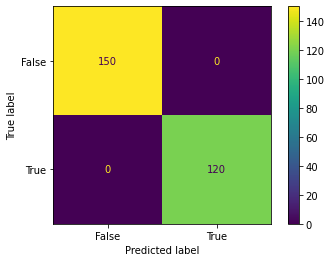

In [82]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

actual = Y
predicted = rounded

confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show() 

In [83]:
# summarize the first 5 cases
for i in range(5):
	print(str(rounded[i]) + '=>(expected '+ str(Y[i]) +')')

1=>(expected 1.0)
0=>(expected 0.0)
1=>(expected 1.0)
0=>(expected 0.0)
0=>(expected 0.0)
